In [1]:
data = [[0, 0, 0, 0]]

H0 = 68
OmegaL = 0.7
OmegaM = 1 - OmegaL
H0 = H0 / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0
x1 = 0.1
x2 = 0

objs = []
for n in range(30):
    objs.append({"x": n * 1000, "x0": n * 1000, "data": [n * 1000]})

while x2 >= 0:
    t -= 1
    x1 += c - H * x1
    x2 += c - H * x2
    z = 0.1 / (x1 - x2) - 1

    for obj in objs:
        obj["x"] -= H * obj["x"]
        obj["data"].append(obj["x"])
    
    
    H = H0 * (OmegaM * (1+z)**3 + OmegaL)**0.5

    data.append([z, t, x2, x2 * (1 + z)])


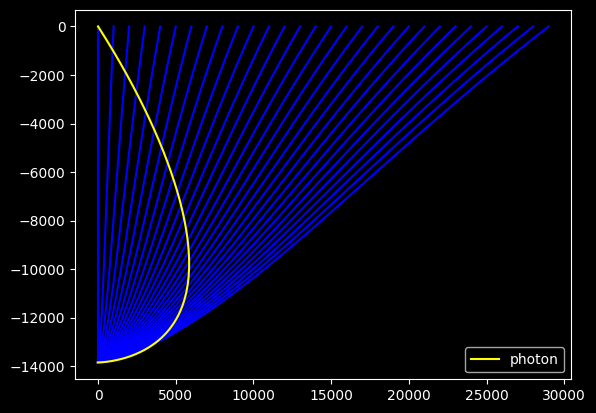

In [2]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
dataz = []
dataC = []
dataA = []
dataT = []


for i in range(len(data)):
    dataz.append(data[i][0])
    dataT.append(data[i][1])
    dataA.append(data[i][2])
    dataC.append(data[i][3])

for obj in objs:
    plt.plot(obj["data"], dataT, color = "blue")


plt.plot(dataA, dataT, label = "photon", color = "yellow")
    
plt.legend()

plt.savefig('wl.png',  bbox_inches='tight')
plt.show()